# Import

In [28]:
from src import GDA
from src.plot.plot_ellipse import plot_cov_ellipse
from src.data.gen_data import generate_multimodal_data
from sklearn.inspection import DecisionBoundaryDisplay

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as SklearnLDA


# Function to compare GMM Discriminant Analysis with Sklearn LDA
def compare_gmm_lda(X_train, X_test, y_train, y_test, gda_components=2, lda_components=2):
    # 1. GMM Discriminant Analysis
    gmm_classifier = GDA(n_components=gda_components, km_init=True)
    gmm_classifier.fit(X_train, y_train)
    y_pred_gmm = gmm_classifier.predict(X_test)
    accuracy_gmm = accuracy_score(y_test, y_pred_gmm)

    # 2. Sklearn LDA for comparison
    lda_sklearn = SklearnLDA(n_components=lda_components, store_covariance=True)
    lda_sklearn.fit(X_train, y_train)
    y_pred_lda = lda_sklearn.predict(X_test)
    accuracy_lda = accuracy_score(y_test, y_pred_lda)

    # 3. Plot the results
    plt.figure(figsize=(10, 5))

    # GMM Discriminant Analysis Plot
    plt.subplot(1, 2, 1)
    plt.title(f"GMM Discriminant Analysis (Accuracy: {accuracy_gmm:.4f})")
    for cls in np.unique(y_train):
        plt.scatter(X_test[y_test == cls, 0], X_test[y_test == cls, 1], label=f"Class {cls}")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

    # Sklearn LDA Plot
    plt.subplot(1, 2, 2)
    plt.title(f"Sklearn LDA (Accuracy: {accuracy_lda:.4f})")
    for cls in np.unique(y_train):
        plt.scatter(X_test[y_test == cls, 0], X_test[y_test == cls, 1], label=f"Class {cls}")
    plt.xlabel('LD1')
    plt.ylabel('LD2')
    plt.legend()

    plt.tight_layout()
    plt.show()




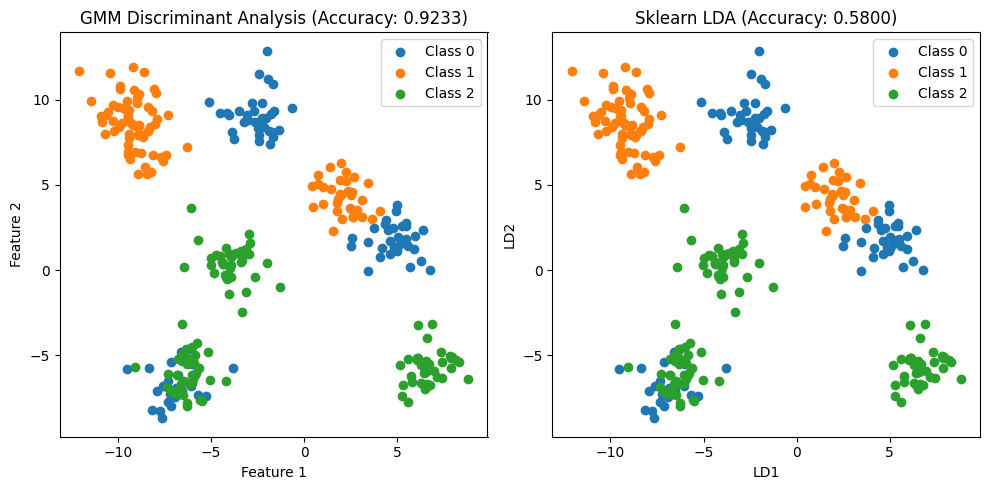

In [30]:
# Generate a multimodal dataset
OMP_NUM_THREADS=1
X, y = generate_multimodal_data(n_samples=1000, n_features=2, n_classes=3, n_clusters_per_class=3)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compare GMM Discriminant Analysis with LDA
compare_gmm_lda(X_train, X_test, y_train, y_test, gda_components=[4, 2, 4])

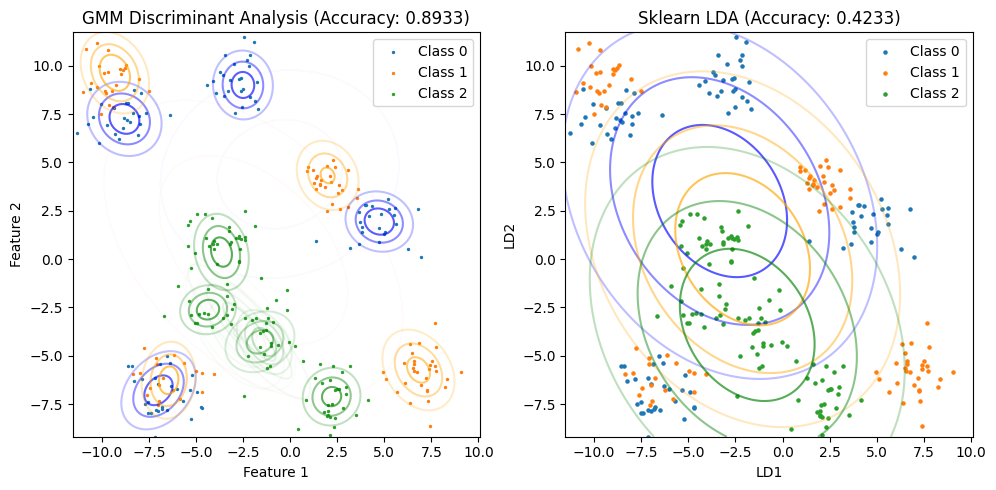

In [37]:
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
import matplotlib.colors as mcolors

# plot means + covariance
def plot_gmm_lda(X_train, X_test, y_train, y_test, n_components=2):


    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # 1. GMM Discriminant Analysis
    gmm_classifier = GDA(n_components=n_components, km_init=True)
    gmm_classifier.fit(X_train, y_train)
    y_pred_gmm = gmm_classifier.predict(X_test)
    accuracy_gmm = accuracy_score(y_test, y_pred_gmm)

    # Plot GMM means and covariance ellipses
    ax = axes[0]
    ax.set_title(f"GMM Discriminant Analysis (Accuracy: {accuracy_gmm:.4f})")
    colors = ['blue', 'orange', 'green'] 
    x, y = np.mgrid[min(X[:, 0]):max(X[:, 0]):.01, min(X[:, 1]):max(X[:, 1]):.01]
    pos = np.dstack((x, y))


    for cls, color in zip(np.unique(y_train), colors):
        ax.scatter(X_test[y_test == cls, 0], X_test[y_test == cls, 1], label=f"Class {cls}", s=2)
        gmm = gmm_classifier.gmms[cls]
        max_weights = max(gmm.weights_)
        for i in range(gmm.n_components):
            mean = gmm.means_[i]
            cov = gmm.covariances_[i]
            tau = gmm.weights_[i] / max_weights
            levels = 3
            shades = [mcolors.to_rgba(color, alpha=(0.25 + i * 0.2)*tau) for i in range(levels)]
            shades = [shades[-1]] + shades[:-1]
            rv = multivariate_normal(mean, cov)
            ax.contour(x, y, rv.pdf(pos), levels=levels, colors=shades)
            # plot_cov_ellipse(cov, mean, ax, color='black', alpha=0.3*tau)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()

    # 2. Sklearn LDA for comparison
    lda_sklearn = SklearnLDA(store_covariance=True)
    lda_sklearn.fit(X_train, y_train)
    y_pred_lda = lda_sklearn.predict(X_test)
    accuracy_lda = accuracy_score(y_test, y_pred_lda)

    # Plot LDA means and covariance
    ax = axes[1]
    ax.set_title(f"Sklearn LDA (Accuracy: {accuracy_lda:.4f})")
    for cls, color in zip(np.unique(y_train), colors):
        ax.scatter(X_test[y_test == cls, 0], X_test[y_test == cls, 1], label=f"Class {cls}", s=5)
        mean = lda_sklearn.means_[cls]
        cov = lda_sklearn.covariance_
        rv = multivariate_normal(mean, cov)

        levels = 3
        shades = [mcolors.to_rgba(color, alpha=0.25 + i * 0.2) for i in range(levels)]
        shades = [shades[-1]] + shades[:-1]
        ax.contour(x, y, rv.pdf(pos), levels=levels, colors=shades)
        # plot_cov_ellipse(cov, mean, ax, color='black')
    ax.set_xlabel('LD1')
    ax.set_ylabel('LD2')
    ax.legend()

    plt.tight_layout()
    plt.show()



# Generate a multimodal dataset
X, y = generate_multimodal_data(n_samples=1000, n_features=2, n_classes=3, n_clusters_per_class=4)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compare GMM Discriminant Analysis with LDA
plot_gmm_lda(X_train, X_test, y_train, y_test, n_components=8)


In [ ]:
# plot means + covariance
def plot_gmm_lda(X_train, X_test, y_train, y_test, n_components=2):


    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # 1. GMM Discriminant Analysis
    gmm_classifier = GDA(n_components=n_components, model_name="bic", km_init=True)
    gmm_classifier.fit(X_train, y_train)
    y_pred_gmm = gmm_classifier.predict(X_test)
    accuracy_gmm = accuracy_score(y_test, y_pred_gmm)

    # Plot GMM means and covariance ellipses
    ax = axes[0]
    ax.set_title(f"GMM Discriminant Analysis (BIC) (Accuracy: {accuracy_gmm:.4f})")
    colors = ['blue', 'orange', 'green'] 
    x, y = np.mgrid[min(X[:, 0]):max(X[:, 0]):.01, min(X[:, 1]):max(X[:, 1]):.01]
    pos = np.dstack((x, y))
   
    for cls, color in zip(np.unique(y_train), colors):
        ax.scatter(X_test[y_test == cls, 0], X_test[y_test == cls, 1], label=f"Class {cls}", s=2)
        gmm = gmm_classifier.gmms[cls]
        max_weights = max(gmm.weights_)
        for i in range(gmm.n_components):
            mean = gmm.means_[i]
            cov = gmm.covariances_[i]
            tau = gmm.weights_[i] / max_weights
            levels = 3
            shades = [mcolors.to_rgba(color, alpha=(0.25 + i * 0.2)*tau) for i in range(levels)]
            shades = [shades[-1]] + shades[:-1]
            rv = multivariate_normal(mean, cov)
            ax.contour(x, y, rv.pdf(pos), levels=levels, colors=shades)

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()

    # 2. Sklearn LDA for comparison
    lda_sklearn = SklearnLDA(store_covariance=True)
    lda_sklearn.fit(X_train, y_train)
    y_pred_lda = lda_sklearn.predict(X_test)
    accuracy_lda = accuracy_score(y_test, y_pred_lda)

    # Plot LDA means and covariance
    ax = axes[1]
    ax.set_title(f"Sklearn LDA (Accuracy: {accuracy_lda:.4f})")
    for cls, color in zip(np.unique(y_train), colors):
        ax.scatter(X_test[y_test == cls, 0], X_test[y_test == cls, 1], label=f"Class {cls}", s=5)
        mean = lda_sklearn.means_[cls]
        cov = lda_sklearn.covariance_
        rv = multivariate_normal(mean, cov)

        levels = 3
        shades = [mcolors.to_rgba(color, alpha=0.25 + i * 0.2) for i in range(levels)]
        shades = [shades[-1]] + shades[:-1]
        ax.contour(x, y, rv.pdf(pos), levels=levels, colors=shades)

    ax.set_xlabel('LD1')
    ax.set_ylabel('LD2')
    ax.legend()

    plt.tight_layout()
    plt.show()



# Generate a multimodal dataset
X, y = generate_multimodal_data(n_samples=1000, n_features=2, n_classes=3, n_clusters_per_class=4)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compare GMM Discriminant Analysis with LDA
plot_gmm_lda(X_train, X_test, y_train, y_test, n_components=8)